In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import string

In [4]:
from stop_words import get_stop_words
stop_words = get_stop_words('vi')

In [5]:
def remove_stopword(words):
    words = words.split()
    filtered_words = [word for word in words if word not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def remove_punctuation(words):
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = words.translate(translator)
    return text_without_punct

In [6]:
data = pd.read_excel('data_v2_1.xlsx')
data.head()

,desc,target
0,Xin chào cửa hàng,0
1,Xin chào,0
2,Chào bạn,0
3,Hello shop,0
4,Chào shop,0


In [7]:
data['desc'] = data['desc'].str.lower()
data['desc'] = data['desc'].apply(remove_punctuation)
data['desc'] = data['desc'].apply(remove_stopword)

In [12]:
labels = ['Spam', 'Lỗi ram',
'CPU bị lỗi chết',
'Lỗi ổ cứng',
'Lỗi màn hình',
'Lỗi pin Laptop',
'Lỗi card mạng',
'Nhiểm virus', 'Lổi taskbar','Lỗi chưa kích hoat key office']

In [13]:
for i in data['target'].unique():
    print(f'{i}: {labels[i]}')

0: Spam
1: Lỗi ram
2: CPU bị lỗi chết
3: Lỗi ổ cứng
4: Lỗi màn hình
5: Lỗi pin Laptop
6: Lỗi card mạng
7: Nhiểm virus
8: Lổi taskbar
9: Lỗi chưa kích hoat key office


In [15]:
data.describe()

,target
count,473.000000
mean,4.289641
std,2.806364
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,9.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   desc    473 non-null    object
 1   target  473 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [8]:
data.tail()

,desc,target
468,nút start windows phản hồi,8
469,nút start windows vô hiệu hóa,8
470,nút start windows ẩn,8
471,nút start windows khóa,8
472,nút start windows cố,8


In [179]:
data.columns

Index(['desc', 'target'], dtype='object')

In [180]:
num_labels = len(data.target.unique())

Text(0.5, 0, 'Label')

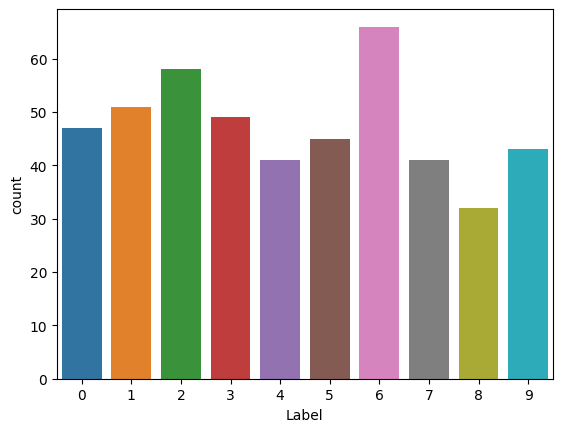

In [181]:
sns.countplot(data=data, x = data['target'])
plt.xlabel('Label')

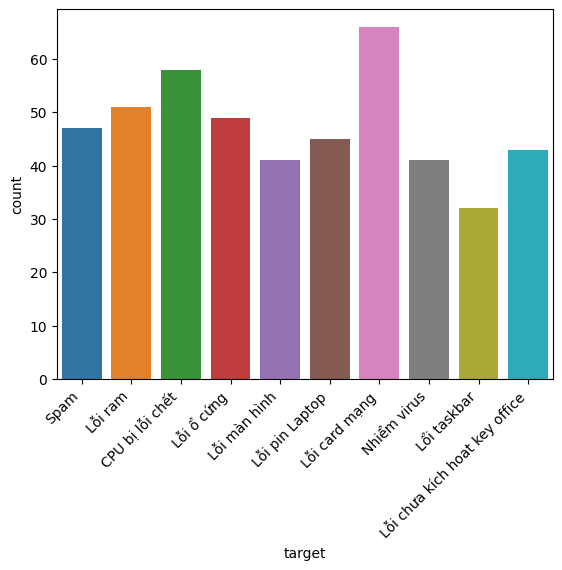

In [182]:
labels = ['Spam', 'Lỗi ram',
'CPU bị lỗi chết',
'Lỗi ổ cứng',
'Lỗi màn hình',
'Lỗi pin Laptop',
'Lỗi card mạng',
'Nhiểm virus', 'Lổi taskbar','Lỗi chưa kích hoat key office']

sns.countplot(data=data, x='target')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
# plt.legend(data['target'].map(dict(enumerate(labels))))
plt.show()


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   desc    473 non-null    object
 1   target  473 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [184]:
data.isna().any()

desc      False
target    False
dtype: bool

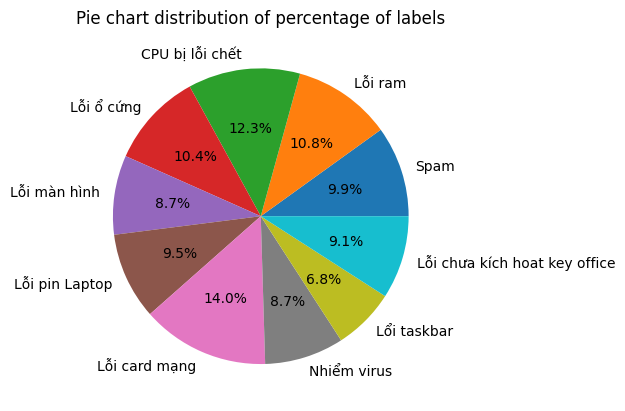

In [11]:
labels = ['Spam', 'Lỗi ram',
'CPU bị lỗi chết',
'Lỗi ổ cứng',
'Lỗi màn hình',
'Lỗi pin Laptop',
'Lỗi card mạng',
'Nhiểm virus', 'Lổi taskbar','Lỗi chưa kích hoat key office']

value_counts = data['target'].value_counts().sort_index()


plt.pie(x = value_counts, labels=labels, autopct='%1.1f%%')
plt.title('Pie chart distribution of percentage of labels')
plt.show()

In [186]:
X = data.desc
y = data.target

In [187]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1)

In [188]:
sorted(Y_train.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [189]:
len(Y_train.unique())

10

In [190]:
sorted(Y_test.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [191]:
len(Y_test.unique())

10

In [192]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_test = sequence.pad_sequences(sequences_test, maxlen=max_len)

In [193]:
print(sequences[:2])

[[247, 98, 99, 248, 249, 112], [158, 178]]


In [194]:
sequences_matrix[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 247,  98,  99, 248, 249, 112],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

In [195]:
num_labels

10

In [196]:
Y_train.unique()

array([0, 8, 7, 6, 3, 5, 1, 2, 9, 4], dtype=int64)

In [197]:
Y_train = to_categorical(Y_train, num_labels)
Y_test = to_categorical(Y_test, num_labels)

In [198]:
Y_train.shape

(425, 10)

In [199]:
model = Sequential()
model.add(Embedding(max_words, 50))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

In [247]:
max_words

1000

In [200]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [201]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 98650 (385.35 KB)
Trainable params: 98650 (385.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [244]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [1]:
# plot_model(model, to_file='LSTM_model.png', show_shapes=True)
# Image(filename='LSTM_model.png')

In [202]:
history = model.fit(sequences_matrix, Y_train,
                    batch_size=10,
                    epochs=200,
                    validation_data = (sequences_matrix_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/200
43/43 [==============================] - 4s 42ms/step - loss: 2.2740 - accuracy: 0.2094 - val_loss: 2.2124 - val_accuracy: 0.2500
Epoch 2/200
43/43 [==============================] - 1s 32ms/step - loss: 2.0133 - accuracy: 0.3200 - val_loss: 1.7694 - val_accuracy: 0.3333
Epoch 3/200
43/43 [==============================] - 1s 31ms/step - loss: 1.4391 - accuracy: 0.4824 - val_loss: 1.1865 - val_accuracy: 0.4583
Epoch 4/200
43/43 [==============================] - 1s 31ms/step - loss: 0.9116 - accuracy: 0.7012 - val_loss: 0.7653 - val_accuracy: 0.7500
Epoch 5/200
43/43 [==============================] - 1s 33ms/step - loss: 0.5979 - accuracy: 0.8235 - val_loss: 0.6176 - val_accuracy: 0.7083
Epoch 6/200
43/43 [==============================] - 1s 33ms/step - loss: 0.4092 - accuracy: 0.8847 - val_loss: 0.4320 - val_accuracy: 0.8750
Epoch 7/200
43/43 [==============================] - 1s 32ms/step - loss: 0.3007 - accuracy: 0.9200 - val_loss: 0.4056 - val_accuracy: 0.8958
Epoch 

In [203]:
df = pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
18,0.017500,0.995294,0.156902,0.958333
19,0.014748,0.997647,0.125874,0.937500
20,0.009624,0.997647,0.131542,0.937500
21,0.007136,0.997647,0.101540,0.958333
22,0.005023,1.000000,0.109093,0.958333


In [204]:
df.to_csv('history.csv')

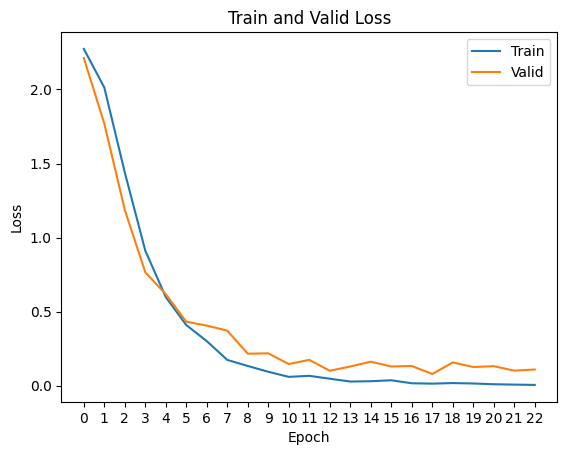

In [205]:
df[['loss', 'val_loss']].plot()
plt.xticks(np.arange(0, df.shape[0]))
plt.title('Train and Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

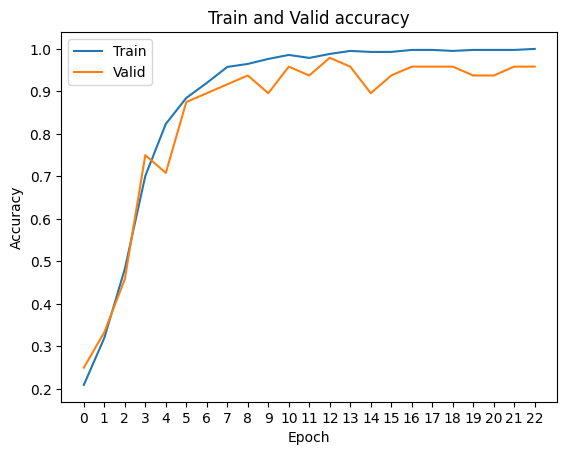

In [221]:
df[['accuracy', 'val_accuracy']].plot()
plt.xticks(np.arange(0, df.shape[0]))
plt.title('Train and Valid accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])
plt.show()

In [248]:
data_evaluate = pd.read_excel('data_test.xlsx')


data_evaluate['desc'] = data_evaluate['desc'].str.lower()
data_evaluate['desc'] = data_evaluate['desc'].apply(remove_punctuation)
data_evaluate['desc'] = data_evaluate['desc'].apply(remove_stopword)

X_evaluate = data_evaluate.desc
y_evaluate = data_evaluate.target

sequences_evaluate = tok.texts_to_sequences(X_evaluate)
sequences_matrix_evaluate  = sequence.pad_sequences(sequences_evaluate, maxlen=max_len)

num_lables_evalute = len(y_evaluate.unique())
y_evaluate = Y_train = to_categorical(y_evaluate, num_lables_evalute)

target
0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: count, dtype: int64


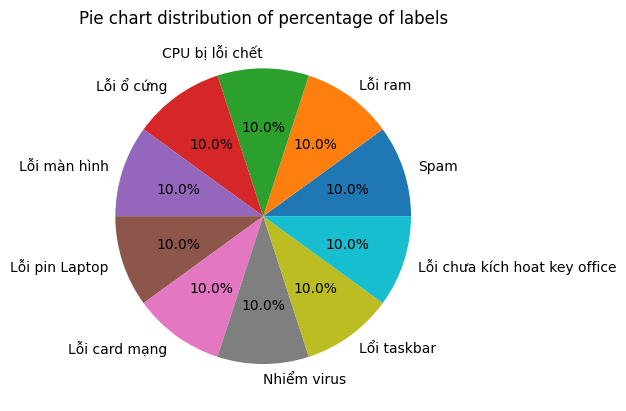

In [250]:
labels = ['Spam', 'Lỗi ram',
'CPU bị lỗi chết',
'Lỗi ổ cứng',
'Lỗi màn hình',
'Lỗi pin Laptop',
'Lỗi card mạng',
'Nhiểm virus', 'Lổi taskbar','Lỗi chưa kích hoat key office']

value_counts = data_evaluate['target'].value_counts().sort_index()

print(value_counts)

plt.pie(x = value_counts, labels=labels, autopct='%1.1f%%')
plt.title('Pie chart distribution of percentage of labels')
plt.show()

In [249]:
model.evaluate(sequences_matrix_evaluate, y_evaluate)

1/1 [==============================] - 0s 33ms/step - loss: 0.3823 - accuracy: 0.9333


[0.38226523995399475, 0.9333333373069763]

In [207]:
#Save the result
from tensorflow.keras.models import load_model
# Creates a HDF5 file 'my_model.h5'
model.save('LSTM_model.h5')

In [208]:
labels = ['Spam', 'Lỗi ram',
'CPU bị lỗi chết',
'Lỗi ổ cứng',
'Lỗi màn hình',
'Lỗi pin Laptop',
'Lỗi card mạng',
'Nhiểm virus', 'Lổi taskbar','Lỗi chưa kích hoat key office']

In [209]:
query = ""
for i in range(len(labels)):
    query += f'insert INTO model_lables (id, solution, name, type) value({i}, "", "{labels[i]}", "")\n'
print(query)

insert INTO model_lables (id, solution, name, type) value(0, "", "Spam", "")
insert INTO model_lables (id, solution, name, type) value(1, "", "Lỗi ram", "")
insert INTO model_lables (id, solution, name, type) value(2, "", "CPU bị lỗi chết", "")
insert INTO model_lables (id, solution, name, type) value(3, "", "Lỗi ổ cứng", "")
insert INTO model_lables (id, solution, name, type) value(4, "", "Lỗi màn hình", "")
insert INTO model_lables (id, solution, name, type) value(5, "", "Lỗi pin Laptop", "")
insert INTO model_lables (id, solution, name, type) value(6, "", "Lỗi card mạng", "")
insert INTO model_lables (id, solution, name, type) value(7, "", "Nhiểm virus", "")
insert INTO model_lables (id, solution, name, type) value(8, "", "Lổi taskbar", "")
insert INTO model_lables (id, solution, name, type) value(9, "", "Lỗi chưa kích hoat key office", "")



In [210]:
str_new = 'ăn cơm chưa'
str_new = str_new.lower()
str_new = remove_punctuation(str_new)
str_new = remove_stopword(str_new)

X_new = pd.Series(data = [str_new])


sequences_new = tok.texts_to_sequences(X_new)
sequences_matrix_new = sequence.pad_sequences(sequences_new, maxlen=max_len)

predicted_probabilities  = model.predict(sequences_matrix_new)
print(labels[np.argmax(predicted_probabilities)])

1/1 [==============================] - 0s 298ms/step
Spam


In [212]:
import joblib
joblib.dump(tok, 'tokenizer.pkl')

['tokenizer.pkl']

In [213]:
loaded_tokenizer = joblib.load('tokenizer.pkl')

In [214]:
str_new = 'Máy tính tôi mau hết pin'
str_new = str_new.lower()
str_new = remove_punctuation(str_new)
str_new = remove_stopword(str_new)

X_new = pd.Series(data = [str_new])


sequences_new = loaded_tokenizer.texts_to_sequences(X_new)
sequences_matrix_new = sequence.pad_sequences(sequences_new, maxlen=max_len)

predicted_probabilities  = model.predict(sequences_matrix_new)
print(labels[np.argmax(predicted_probabilities)])

1/1 [==============================] - 0s 19ms/step
Lỗi pin Laptop


In [215]:
str_new = 'Tôi muốn mua laptop'
str_new = str_new.lower()
str_new = remove_punctuation(str_new)
str_new = remove_stopword(str_new)

X_new = pd.Series(data = [str_new])


sequences_new = loaded_tokenizer.texts_to_sequences(X_new)
sequences_matrix_new = sequence.pad_sequences(sequences_new, maxlen=max_len)

predicted_probabilities  = model.predict(sequences_matrix_new)
print(labels[np.argmax(predicted_probabilities)])

1/1 [==============================] - 0s 20ms/step
Spam


In [216]:
str_new = 'Máy kêu tít tít khi khởi động máy'
str_new = str_new.lower()
str_new = remove_punctuation(str_new)
str_new = remove_stopword(str_new)

X_new = pd.Series(data = [str_new])


sequences_new = loaded_tokenizer.texts_to_sequences(X_new)
sequences_matrix_new = sequence.pad_sequences(sequences_new, maxlen=max_len)

predicted_probabilities  = model.predict(sequences_matrix_new)
print(labels[np.argmax(predicted_probabilities)])

1/1 [==============================] - 0s 20ms/step
Lỗi ram


In [220]:
str_new = 'thanh  start menu của tôi nó đơ lắm tôi kích chuột vào không được'
str_new = str_new.lower()
str_new = remove_punctuation(str_new)
str_new = remove_stopword(str_new)

X_new = pd.Series(data = [str_new])


sequences_new = loaded_tokenizer.texts_to_sequences(X_new)
sequences_matrix_new = sequence.pad_sequences(sequences_new, maxlen=max_len)

predicted_probabilities  = model.predict(sequences_matrix_new)
print(labels[np.argmax(predicted_probabilities)])

1/1 [==============================] - 0s 21ms/step
Lổi taskbar


In [18]:
df = pd.read_csv('history.csv')

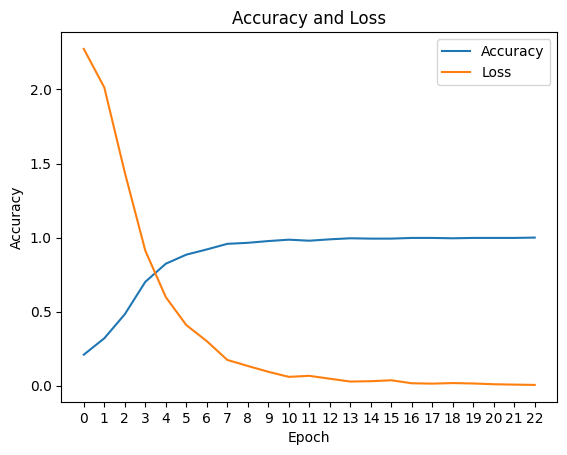

In [20]:
df[['accuracy', 'loss']].plot()
plt.xticks(np.arange(0, df.shape[0]))
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Loss'])
plt.show()

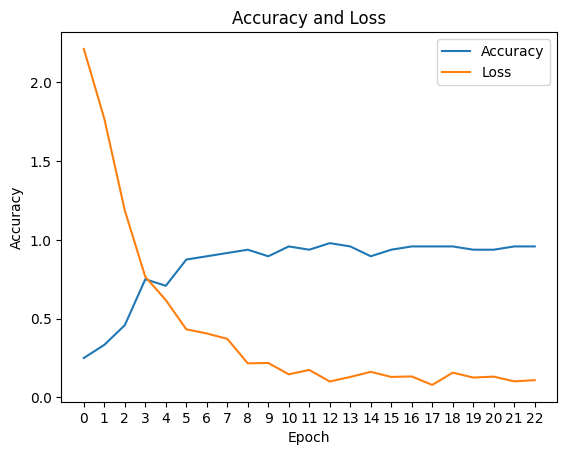

In [22]:
df[['val_accuracy', 'val_loss']].plot()
plt.xticks(np.arange(0, df.shape[0]))
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [23]:
data_evaluate = pd.read_excel('data_test.xlsx')

In [24]:
data_evaluate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   desc    30 non-null     object
 1   target  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes
